In [82]:
#importing all the required libraries that will be used in this project
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

pd.set_option("display.max_columns",500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

# Getting Data set

In [62]:
#reading the files 'players_15.csv' and  'players_20.csv' as  pandas dataframes
df_15 = pd.read_csv("/content/drive/MyDrive/players_15.csv")
df_15["year"] = 2015
df_20 = pd.read_csv("/content/drive/MyDrive/players_20.csv")
df_20["year"] = 2020  

In [63]:
#we will take a look at the first three rows 
df_20.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,year
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,2020
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,2020
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,2020


# Data Manipulation

In [64]:
skill = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm',
         'rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for i in skill:
  if df_15[i].dtype=='O':
    df_15[i] = df_15[i].str.replace('+','!')
    df_15[i] = df_15[i].str.replace('-','!')
    df_15[i] = df_15[i].str.split('!',expand=True)[0].fillna('0').astype('int64')
  if df_20[i].dtype=='O':
    df_20[i] = df_20[i].str.replace('+','!')
    df_20[i] = df_20[i].str.replace('-','!')
    df_20[i] = df_20[i].str.split('!',expand=True)[0].fillna('0').astype('int64')

# Creating New Columns Skill_score by using skill columns

In [65]:
#creating the new empty columns 
df_15['skill_score_15'] = 0
df_20['skill_score_20'] = 0

In [66]:
for i in skill:
  df_15['skill_score_15'] = df_15['skill_score_15'] + df_15[i]
  df_20['skill_score_20'] = df_20['skill_score_20'] + df_20[i]

In [67]:
df_15_sel = df_15[['sofifa_id','short_name','club','overall','potential','international_reputation','skill_score_15']]
df_15_sel.columns = ['sofifa_id','short_name','club','overall_15','potential_15','international_reputation_15','skill_score_15']

df_20_sel = df_20[['sofifa_id','overall','potential','international_reputation','skill_score_20']]
df_20_sel.columns = ['sofifa_id','overall_20','potential_20','international_reputation_20','skill_score_20']

In [68]:
#merging all the columns into one data frame
df = df_15_sel.merge(df_20_sel,how='left')

In [69]:
#removing the data which has null points
df = df.dropna()

In [70]:
#we will take a quick look at the data
df.head()

,sofifa_id,short_name,club,overall_15,potential_15,international_reputation_15,skill_score_15,overall_20,potential_20,international_reputation_20,skill_score_20
0,158023,L. Messi,FC Barcelona,93,95,5,1967,94.0,94.0,5.0,2072.0
1,20801,Cristiano Ronaldo,Real Madrid,92,92,5,1981,93.0,93.0,5.0,1998.0
3,41236,Z. Ibrahimović,Paris Saint-Germain,90,90,5,1933,85.0,85.0,5.0,1785.0
4,167495,M. Neuer,FC Bayern München,90,90,5,0,88.0,88.0,5.0,0.0
5,176580,L. Suárez,FC Barcelona,89,91,5,1976,89.0,89.0,5.0,1984.0


# Calculating strength

In [71]:
#we will check the strength 
df['strength_15'] = df['overall_15']+df['potential_15']
df['strength_20'] = df['overall_20']+df['potential_20']

df = df.drop(['overall_15','potential_15','overall_20','potential_20'],axis=1)

In [72]:
#we will take a look at the data after dropped columns
df.head()

,sofifa_id,short_name,club,international_reputation_15,skill_score_15,international_reputation_20,skill_score_20,strength_15,strength_20
0,158023,L. Messi,FC Barcelona,5,1967,5.0,2072.0,188,188.0
1,20801,Cristiano Ronaldo,Real Madrid,5,1981,5.0,1998.0,184,186.0
3,41236,Z. Ibrahimović,Paris Saint-Germain,5,1933,5.0,1785.0,180,170.0
4,167495,M. Neuer,FC Bayern München,5,0,5.0,0.0,180,176.0
5,176580,L. Suárez,FC Barcelona,5,1976,5.0,1984.0,180,178.0


# Team and League Data

In [73]:
#we will read the team and league data
team_league = pd.read_csv(r'/content/drive/MyDrive/fifa_teams.csv')
team_league.head()

,country,league,team,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,England,English Premier League,Leicester City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,England,English Premier League,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,England,English Premier League,Tottenham Hotspur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,England,English Premier League,Manchester City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,England,English Premier League,Manchester United,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
#we will select the series we want i.e. given by
team_league = team_league.iloc[:,:3]
team_league.rename(columns={'team':'club'},inplace=True)
team_league.head()

,country,league,club
0,England,English Premier League,Leicester City
1,England,English Premier League,Arsenal
2,England,English Premier League,Tottenham Hotspur
3,England,English Premier League,Manchester City
4,England,English Premier League,Manchester United


In [75]:
df[df['club'].isin(team_league['club'].drop_duplicates())].head()

,sofifa_id,short_name,club,international_reputation_15,skill_score_15,international_reputation_20,skill_score_20,strength_15,strength_20
0,158023,L. Messi,FC Barcelona,5,1967,5.0,2072.0,188,188.0
1,20801,Cristiano Ronaldo,Real Madrid,5,1981,5.0,1998.0,184,186.0
3,41236,Z. Ibrahimović,Paris Saint-Germain,5,1933,5.0,1785.0,180,170.0
4,167495,M. Neuer,FC Bayern München,5,0,5.0,0.0,180,176.0
5,176580,L. Suárez,FC Barcelona,5,1976,5.0,1984.0,180,178.0


# Merge Data Set

In [76]:
#we will merge the data set 
df = df.merge(team_league,how='left').dropna()

In [77]:
df.drop(['international_reputation_20','international_reputation_15'],axis=1,inplace=True)

In [78]:
#we will take at the data after removing the null data points
df.head()

,sofifa_id,short_name,club,skill_score_15,skill_score_20,strength_15,strength_20,country,league
0,158023,L. Messi,FC Barcelona,1967,2072.0,188,188.0,Spain,La Liga
1,20801,Cristiano Ronaldo,Real Madrid,1981,1998.0,184,186.0,Spain,La Liga
2,41236,Z. Ibrahimović,Paris Saint-Germain,1933,1785.0,180,170.0,France,Ligue 1
3,167495,M. Neuer,FC Bayern München,0,0.0,180,176.0,Germany,Bundesliga
4,176580,L. Suárez,FC Barcelona,1976,1984.0,180,178.0,Spain,La Liga


# Creating Growth DataFrame

In [79]:
club_growth = pd.DataFrame({})

In [80]:
s = [1 for i in range(df.shape[0])]
df['s'] = s
club_growth['strength_growth'] = (df.groupby(by='club').sum()['strength_20'] -  df.groupby(by='club').sum()['strength_15'])*100/  df.groupby(by='club').sum()['strength_15']
club_growth['skill_score_growth'] = (df.groupby(by='club').sum()['skill_score_20'] -  df.groupby(by='club').sum()['skill_score_15'])*100/  df.groupby(by='club').sum()['skill_score_15')

In [83]:
#we will use MinMaxScaler() for scaling 
scaler = MinMaxScaler()
club_growth['score'] = scaler.fit_transform(club_growth['skill_score_growth'].values.reshape(-1, 1))
club_growth['score'] = np.round(club_growth['score']*100)

# Top 5 from Growth DataFrame

In [86]:
#we will sort the growth data frame in decreasing manner
top_5_club = club_growth.sort_values(by='score',ascending=False)[:5]

In [87]:
#we will have a look at the data
top_5_club

,strength_growth,skill_score_growth,score
club,,,
Angers SCO,11.270296,15.466962,100.0
RCD Espanyol,10.190114,12.353389,81.0
OGC Nice,7.207616,11.911394,78.0
FC Nantes,6.160242,11.950886,78.0
RC Celta,8.138629,11.004374,72.0


# Plot

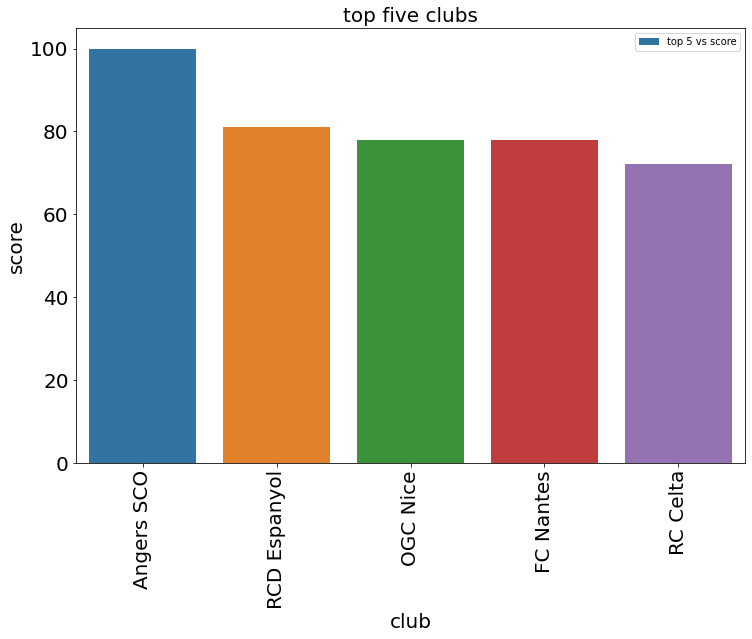

In [93]:
#plotting the data in bar graph form
plt.figure(figsize=(12,8))
sns.barplot(top_5_club.index,top_5_club['score'],label='top 5 vs score')
plt.xlabel('club',size=20)
plt.xticks(rotation=90,size=20)
plt.ylabel('score',size=20)
plt.yticks(size=20)
plt.title('top five clubs',size=20)
plt.legend()
plt.show()

# Finally we can say that Angers SCO has best staffing followed by RCD Espanyol, OGC Nice, FC Nantes and RC Celta